<a href="https://colab.research.google.com/github/Jeff-Meendering/PetPerceiverAI/blob/main/PetPerceiverAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import tensorflow_datasets as tfds

In [2]:
ds, ds_info = tfds.load('cats_vs_dogs', shuffle_files=True, as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incompleteDYEEGM/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [3]:
train, valid = ds["train"], None

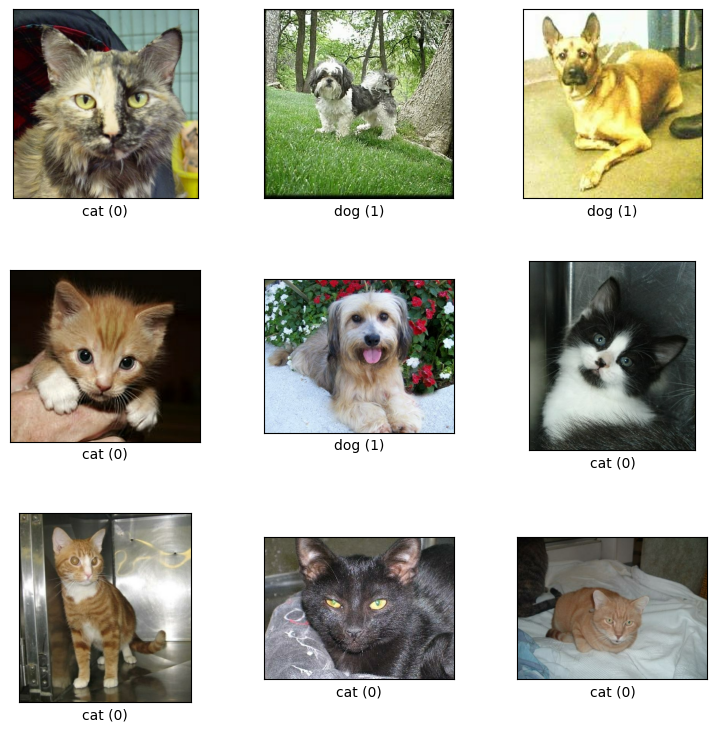

In [4]:
fig = tfds.show_examples(train, ds_info)

In [5]:
MAX_SIDE_LEN = 128
CAT = 0
DOG = 1

train = train.map(lambda image, label: (tf.cast(tf.image.resize(image, [MAX_SIDE_LEN, MAX_SIDE_LEN]), dtype=tf.int32), tf.cast(label == CAT, tf.int32)))

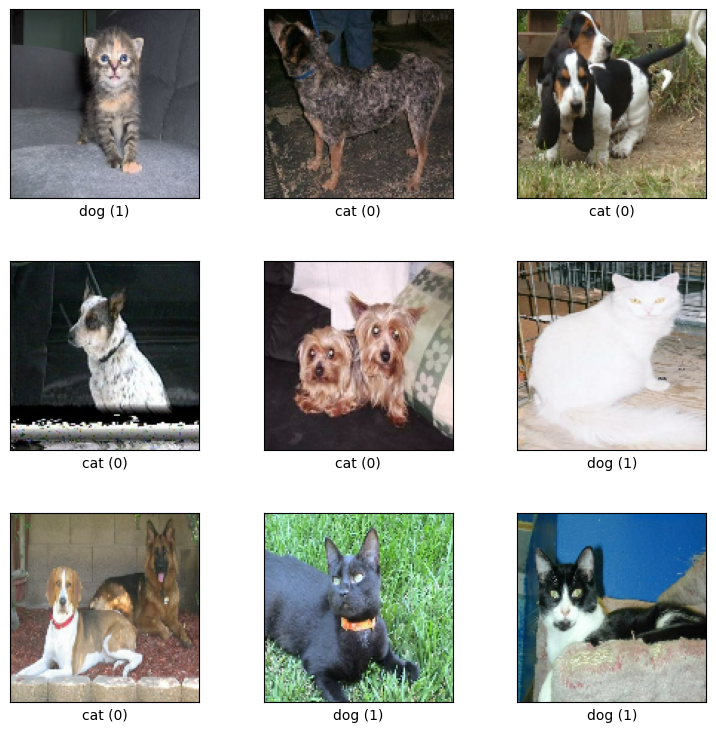

In [6]:
fig = tfds.show_examples(train, ds_info)

In [7]:
train_size, valid_size = 750, 250
train_dogs = train.filter(lambda _, label: label == 1)
train_cats = train.filter(lambda _, label: label == 0)

In [8]:
batch_size = 16
train_ds = tf.data.Dataset.sample_from_datasets([train_dogs, train_cats], weights=[0.5, 0.5], stop_on_empty_dataset=True)
train_ds = train_ds.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [9]:
for image, label in train_ds.take(3):
  print(image[0][0][0])
  print(label)

tf.Tensor([1 0 4], shape=(3,), dtype=int32)
tf.Tensor([1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1], shape=(16,), dtype=int32)
tf.Tensor([194 198 201], shape=(3,), dtype=int32)
tf.Tensor([1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0], shape=(16,), dtype=int32)
tf.Tensor([92 66  7], shape=(3,), dtype=int32)
tf.Tensor([1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1], shape=(16,), dtype=int32)


In [10]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [11]:
random.seed(0)
model = models.Sequential()
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(MAX_SIDE_LEN, MAX_SIDE_LEN, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1))

In [12]:
lr = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
epochs=50
history = model.fit(
  train_ds,
  epochs=epochs,
  verbose=1
)

Epoch 1/50
     29/Unknown - 43s 1s/step - loss: 1.9352 - accuracy: 0.4849

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-085939086213>", line 2, in <cell line: 2>
    history = model.fit(
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 832, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polym

TypeError: object of type 'NoneType' has no len()